In [1]:
!pip install gym

In [ ]:
"""
Solving FrozenLake8x8 environment using Policy iteration.
Author : Moustafa Alzantot (malzantot@ucla.edu)
Citation: https://medium.com/@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa
"""

In [20]:
import numpy as np
import gym
from gym import wrappers
import time as time
np.random.seed(42)
import matplotlib.pyplot as plt



def run_episode(env, policy, gamma = 1.0, render = False):
    """ Runs an episode and return the total reward """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0, n = 1000):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return scores

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s]
    and solve them to find the value function.
    """
    v = np.zeros(env.observation_space.n)
    eps = 1e-10
    #eps=0.1
    while True:
        prev_v = np.copy(v)
        for s in range(env.observation_space.n):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v
def policy_iteration(env, gamma = 1.0):
    """ Policy-Iteration algorithm """
    policy = np.random.choice(env.action_space.n, size=(env.observation_space.n))  # initialize a random policy
    max_iterations = 10000
    errors = []
    gamma = 1.0
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
        v = compute_policy_v(env, policy, gamma)
        error = np.mean(np.abs(old_policy_v - v))
        errors.append(error)
    return policy, errors

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Policy-Iteration converged at step 13.


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


1.0000000000000022e-180
Average scores =  1.0001000000020009e-80
Policy-Iteration converged at step 12.
1.0000000000000016e-231
Average scores =  1.0030010000040037e-66
Policy-Iteration converged at step 12.
0.0
Average scores =  1.0001000000020105e-32
Policy-Iteration converged at step 6.
1.0000000000000019e-35
Average scores =  2.031123224225361e-23
Policy-Iteration converged at step 13.
2.361183241434832e-50
Average scores =  1.0572080462824695e-14
Policy-Iteration converged at step 7.
7.41069371118829e-53
Average scores =  5.71362081058086e-09
Policy-Iteration converged at step 8.
2.571100870814394e-07
Average scores =  0.0603327190865942
Policy-Iteration converged at step 13.
1.0
Average scores =  879.0


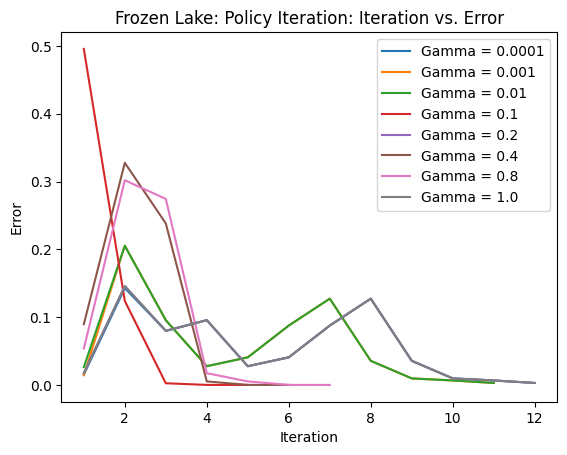

In [24]:
gammas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 1.0]


iteration_errors = {}
for gamma in gammas:
    env_name  = 'FrozenLake8x8-v1'
    env = gym.make(env_name)
    optimal_policy, errors = policy_iteration(env, gamma = gamma)
    scores = evaluate_policy(env, optimal_policy, gamma = gamma)
    iteration_errors[gamma] = errors
    print(scores[-1])
    print('Average scores = ', np.sum(scores))

# Plot iteration vs. error for each gamma
for gamma, errors in iteration_errors.items():
    plt.plot(range(1, len(errors) + 1), errors, label='Gamma = {}'.format(gamma))


plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Frozen Lake: Policy Iteration: Iteration vs. Error')
plt.legend()
plt.show()

In [36]:
import numpy as np
import gym
import seaborn as sns
import matplotlib.pyplot as plt
import time

def run_episode(env, policy, gamma=1.0, render=False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward received by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done, _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma=1.0, n=2000):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [run_episode(env, policy, gamma=gamma, render=False) for _ in range(n)]
    return scores

def extract_policy(v, gamma=1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy

def value_iteration(env, gamma=1.0):
    """ Value-iteration algorithm """
    v = np.zeros(env.observation_space.n)  # initialize value-function
    max_iterations = 10000
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.observation_space.n):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)]
            v[s] = max(q_sa)
        if np.sum(np.fabs(prev_v - v)) <= eps:
            print('Value-iteration converged at iteration# %d.' % (i+1))
            break
    return v


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gamma = 1.0


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Value-iteration converged at iteration# 2357.


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Policy average score =  0.8734
[0.000e+00 0.000e+00 1.000e+00 ... 8.732e+03 8.733e+03 8.734e+03]


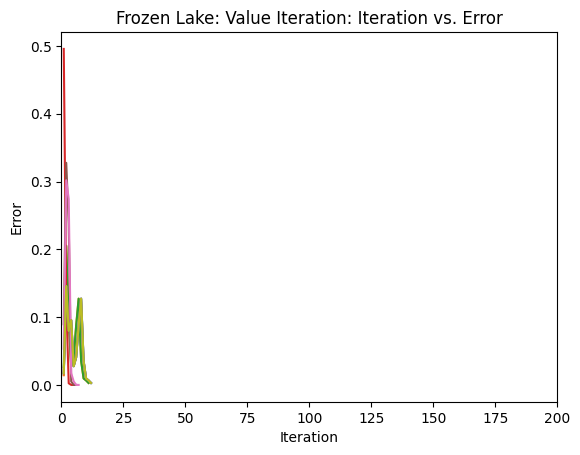

In [37]:
for i in [1.0]:
    print("gamma = " + str(i))
    env_name  = 'FrozenLake8x8-v1'
    gamma = i
    env = gym.make(env_name)
    optimal_v = value_iteration(env, i);
    policy = extract_policy(optimal_v, i)
    policy_scores = evaluate_policy(env, policy, i, n=10000)
    print('Policy average score = ', np.mean(policy_scores))
    print(np.cumsum(policy_scores))

# Plot iteration vs. error for each gamma
for gamma, errors in iteration_errors.items():
    plt.plot(range(1, len(errors) + 1), errors, label='Gamma = {}'.format(gamma))



plt.xlim(0, 200)
# Plotting error per iteration
plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Frozen Lake: Value Iteration: Iteration vs. Error')
plt.show()

In [2]:
import time
import numpy as np
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import random
from matplotlib import pyplot as plt

In [29]:
def eps_greedy(Q, s, eps=0.1):
    '''
    Epsilon greedy policy
    '''
    if np.random.uniform(0, 1) < eps:
        # Choose a random action
        return np.random.randint(Q.shape[1])
    else:
        # Choose the action of a greedy policy
        return greedy(Q, s)

def greedy(Q, s):
    '''
    Greedy policy
    return the index corresponding to the maximum action-state value
    '''
    return np.argmax(Q[s])

def run_episodes(env, Q, num_episodes=100):
    '''
    Run some episodes to test the policy
    '''
    tot_rew = []
    state = env.reset()

    for _ in range(num_episodes):
        done = False
        game_rew = 0

        while not done:
            # select a greedy action
            next_state, rew, done, _, info = env.step(greedy(Q, state))

            state = next_state
            game_rew += rew
            if done:
                state = env.reset()
                tot_rew.append(game_rew)

    return np.mean(tot_rew)
def Q_learning(env, lr=0.01, lr_min=0.0001, lr_decay=0.99, num_episodes=10000, eps=0.3, gamma=0.95, eps_decay=0.00005,
               eps_min=0.0001):
    nA = env.action_space.n
    nS = env.observation_space.n

    # Initialize the Q matrix
    # Q: matrix nS*nA where each row represent a state and each colums represent a different action
    Q = np.zeros((nS, nA))
    games_reward = []
    test_rewards = []

    for ep in range(num_episodes):
        state = env.reset()
        done = False
        tot_rew = 0

        # decay the epsilon value until it reaches the threshold of 0.01
        if eps > eps_min:
            eps *= eps_decay
            eps = max(eps, eps_min)

        # decay the learning rate until it reaches the threshold of lr_min
        if lr > lr_min:
            lr *= lr_decay
            lr = max(lr, lr_min)

        # loop the main body until the environment stops
        while not done:
            # select an action following the eps-greedy policy
            action = eps_greedy(Q, state, eps)

            next_state, rew, done, _, info = env.step(action)  # Take one step in the environment
            rew -= (0.01 * done)

            # Q-learning update the state-action value (get the max Q value for the next state)
            Q[state][action] = Q[state][action] + lr * (rew + gamma * np.max(Q[next_state]) - Q[state][action])

            state = next_state
            tot_rew += rew
            if done:
                games_reward.append(tot_rew)

    return Q


def run_fl(size):
    seed_val = 42
    np.random.seed(seed_val)
    random.seed(seed_val)
    if size == 4:
        env = gym.make("FrozenLake-v1")
    else:
        seed_val = 58
        np.random.seed(seed_val)
        random.seed(seed_val)
        dim = size
        random_map = generate_random_map(size=dim, p=0.8)

        env = gym.make("FrozenLake-v1", desc=random_map)
    env.seed(seed_val)

    env.reset()
    # env.render()

    # env = gym.make('FrozenLake8x8-v0')
    env = env.unwrapped

    learning_rates = [0.001, 0.01, 0.00001, 0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0]
    lr_decays = [1.0, 0.99, 0.9999, 0.999, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
    lr_mins = [0.00001]
    epsilons = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
    gammas = [0.9999, 0.999, 0.99, 0.9, 0.99999, 0.999999, 1.0]
    epsilon_decays = [0.99, 0.9999, 0.99999, 0.999999, 0.999, 0.9, 0.8, 0.7]
    epsilon_mins = [0.00001]

    best_lr, best_e, best_g, best_ed, best_em, best_rew = 0, 0, 0, 0, 0, -1

    for em in epsilon_mins:
        for am in lr_mins:
            for ad in lr_decays:
                for e in epsilons:
                    for g in gammas:
                        for a in learning_rates:
                            for ed in epsilon_decays:

                                tot_rew = 0
                                num_seeds = 4
                                cnt = 0
                                for x in range(num_seeds):
                                    cnt += 1
                                    seed_val = x
                                    np.random.seed(seed_val)
                                    random.seed(seed_val)
                                    env.seed(x)
                                    Q_qlearning = Q_learning(env, lr=a, lr_decay=ad, lr_min=am,
                                                             num_episodes=1000, eps=e, gamma=g, eps_decay=ed,
                                                             eps_min=em)
                                    tot_rew += run_episodes(env, Q_qlearning, 15)
                                    if tot_rew < 0.3:
                                        break

                                print(e, em, ed, a, ad, am, g, tot_rew / cnt)



    iter_arr = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000,10000]
    time_arr = []
    rew_arr = []
    V_arr = []
    for t in tests:
        print(t)
        temp_iter = []
        for i in iter_arr:
            temp_iter.append(i)
            start = time.time()
            Q_qlearning = Q_learning(env, lr=t[3], lr_decay=t[4], lr_min=t[5],
                                     num_episodes=i, eps=t[0], gamma=t[6], eps_decay=t[2],
                                     eps_min=t[1])
            run_time = time.time() - start
            print('running tests')
            rew = run_episodes(env, Q_qlearning, 200) * 100
            tot_V = 0
            for s in range(env.observation_space.n):
                tot_V += Q_qlearning[s][np.argmax(Q_qlearning[s])]
            print(i, rew, tot_V / env.observation_space.n, run_time)
            time_arr.append(run_time)
            rew_arr.append(rew)
            V_arr.append((tot_V))

            # Plot Delta vs iterations
            fig, ax1 = plt.subplots()

            color = 'tab:blue'
            ax1.set_ylabel('Reward %/Avg V', color=color)
            ax1.plot(temp_iter, rew_arr, color=color, label='Reward %')
            ax1.plot(temp_iter, V_arr, color='darkblue', label='Avg V')
            ax1.legend()
            ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

            color = 'tab:red'
            ax2.set_xlabel('Iterations')
            ax2.set_ylabel('Time', color=color)
            ax2.plot(temp_iter, time_arr, color=color)
            ax2.tick_params(axis='y', labelcolor=color)

            plt.show()

    def extract_policy(value_table, gamma=1.0):
        policy = np.zeros(env.observation_space.n)
        for state in range(env.observation_space.n):
            Q_table = np.zeros(env.action_space.n)
            for action in range(env.action_space.n):
                for next_sr in env.P[state][action]:
                    trans_prob, next_state, reward_prob, _ = next_sr
                    Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
            policy[state] = np.argmax(Q_table)

        return policy



In [ ]:
run_fl(4)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


1.0 1e-05 0.99 0.001 1.0 1e-05 0.9999 0.6833333333333333
1.0 1e-05 0.9999 0.001 1.0 1e-05 0.9999 0.6666666666666666
1.0 1e-05 0.99999 0.001 1.0 1e-05 0.9999 0.7833333333333333
1.0 1e-05 0.999999 0.001 1.0 1e-05 0.9999 0.7833333333333333
1.0 1e-05 0.999 0.001 1.0 1e-05 0.9999 0.7666666666666667
1.0 1e-05 0.9 0.001 1.0 1e-05 0.9999 0.8666666666666666
1.0 1e-05 0.8 0.001 1.0 1e-05 0.9999 0.8166666666666667
1.0 1e-05 0.7 0.001 1.0 1e-05 0.9999 0.8166666666666667
1.0 1e-05 0.99 0.01 1.0 1e-05 0.9999 0.39999999999999997
1.0 1e-05 0.9999 0.01 1.0 1e-05 0.9999 0.5833333333333333
1.0 1e-05 0.99999 0.01 1.0 1e-05 0.9999 0.26666666666666666
1.0 1e-05 0.999999 0.01 1.0 1e-05 0.9999 0.7499999999999999
1.0 1e-05 0.999 0.01 1.0 1e-05 0.9999 0.5
1.0 1e-05 0.9 0.01 1.0 1e-05 0.9999 0.7666666666666666
1.0 1e-05 0.8 0.01 1.0 1e-05 0.9999 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

['SFFHFHFF', 'FHFFFFFF', 'HFFFFFFF', 'HFFFFFFF', 'FFFFFFFF', 'HFFFFFFF', 'HHFHHFHF', 'HHFFFFHG']


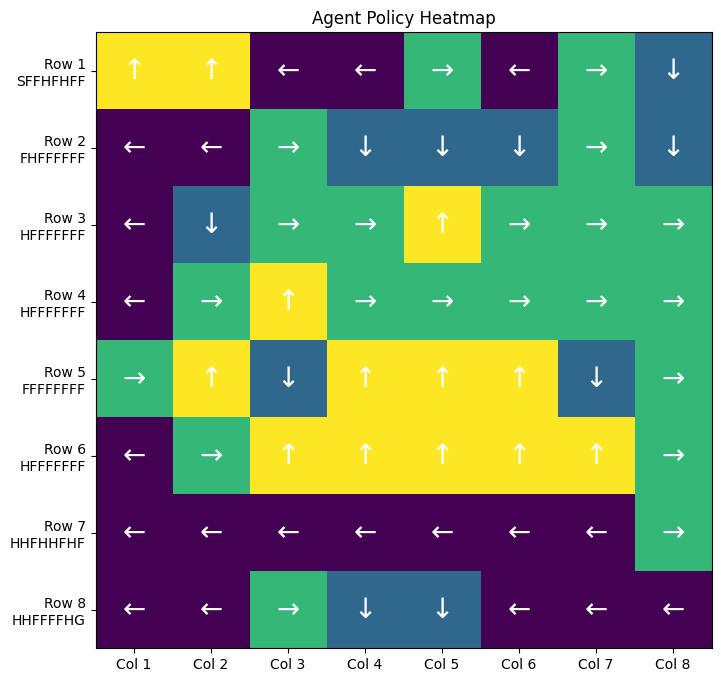

In [45]:
seed_val = 42
np.random.seed(seed_val)
random.seed(seed_val)
random_map = generate_random_map(size=8, p=0.8)
env = gym.make("FrozenLake-v1", desc=random_map)
env.seed(seed_val)
env.reset()

env = env.unwrapped
start = time.time()
Q_qlearning = Q_learning(env, lr=0.001, lr_decay=1.0, lr_min=0.00001, num_episodes=500, eps=1.0, gamma=0.9999, eps_decay=0.9, eps_min= 0.00001)
run_time = time.time() - start
rew = run_episodes(env, Q_qlearning, 10000) * 100
tot_V = 0
rew_arr = []
time_arr = []
for s in range(env.observation_space.n):
  tot_V += Q_qlearning[s][np.argmax(Q_qlearning[s])]
  #print(rew, tot_V / env.observation_space.n, run_time)
  time_arr.append(run_time)
  rew_arr.append(rew)
  #V_arr.append((tot_V))

# Extracting episode number and error for plotting
#iterations = [stat["Iteration"] for stat in Q_qlearning.run_stats]
#errors = [stat["Error"] for stat in Q_qlearning.run_stats]
rewards = np.cumsum(rew_arr)
time_arr = np.cumsum(time_arr)

print(random_map)

Q = Q_qlearning.reshape(8, 8, -1)
policy = np.argmax(Q, axis=2)
plot_policy_heatmap(policy, random_map)

# Plotting error rate over iterations
#plt.figure(figsize=(10, 6))
#plt.plot(rewards, marker='', linestyle='-')
#plt.xlabel('Iterations')
#plt.ylabel('Rewards')
#plt.title('Cumulative Rewards over Iterations')
#plt.xlim(0, 800)
#plt.grid(True)
#plt.show()

# Plotting time over iterations
#plt.figure(figsize=(10, 6))
#plt.plot(time_arr, marker='', linestyle='-')
#plt.xlabel('Iterations')
#plt.ylabel('Time (seconds)')
#plt.title('Time over Iterations')
#plt.grid(True)
#plt.show()


In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Frozen Lake environment size
grid_size = 4

# Example policy: Replace this with the actual policy learned by the agent
# Assume actions are represented as integers: 0 (Left), 1 (Down), 2 (Right), 3 (Up)
policy = np.random.randint(4, size=(grid_size, grid_size))

# Function to convert action index to arrow direction
def action_to_arrow(action):
    if action == 0:
        return '←'  # Left
    elif action == 1:
        return '↓'  # Down
    elif action == 2:
        return '→'  # Right
    elif action == 3:
        return '↑'  # Up
    else:
        return 'X'  # Invalid action

# Generate heatmap of actions
def plot_policy_heatmap(policy, random_map):
    grid_size = len(random_map)
    plt.figure(figsize=(grid_size, grid_size))
    plt.imshow(policy, cmap='viridis', interpolation='nearest')

    # Add arrows indicating actions
    for i in range(grid_size):
        for j in range(grid_size):
            action = policy[i, j]
            plt.text(j, i, action_to_arrow(action), ha='center', va='center', fontsize=20, color='white')

    # Add labels for rows and columns
    plt.xticks(range(grid_size), [f'Col {col+1}' for col in range(grid_size)])
    plt.yticks(range(grid_size), [f'Row {row+1}\n{random_map[row]}' for row in range(grid_size)])

    plt.title('Agent Policy Heatmap')
    plt.show()

# Plot the heatmap


Best Hyperparameters for Q Learning ran through grid search